# ShorelineMonitor: Satellite-Derived Shoreline-Series

The
[ShorelineMonitor-Shorelines](https://radiantearth.github.io/stac-browser/#/external/coclico.blob.core.windows.net/stac/v1/shorelinemonitor-shorelines/collection.json)
dataset provides Satellite-Derived Shorelines (SDS) extracted from annually composited
Landsat satellite imagery spanning the years 1984-2024. These shorelines are mapped onto
the [Global Coastal Transect System
(GCTS)](https://github.com/TUDelft-CITG/coastpy/blob/main/tutorials/global_coastal_transect_system.ipynb).
Together they compose a new dataset that consists of time series per transect.
The ShorelineMonitor-Series consists of more than 350 million observations, each with 54
attributes. The dataset and attributes are described in this [STAC
collection](https://radiantearth.github.io/stac-browser/#/external/coclico.blob.core.windows.net/stac/v1/shorelinemonitor-series/collection.json).
Please have a look at the metadata in one of the items. The dataset is available upon reasonable request. Please contact the data provider for more information or collaboration opportunities.  

In [1]:
import os

import dotenv
import fsspec
import geopandas as gpd
import hvplot.pandas
import pandas as pd
import pystac
import shapely
from dotenv import load_dotenv
from ipyleaflet import Map, basemaps

from coastpy.stac.utils import read_snapshot

# Specify the absolute path to the .env file
dotenv_path = "/Users/juulhemmes/Documents/Studie/Msc/Thesis/coastpy/ATT64895.env"

load_dotenv(dotenv_path=dotenv_path)
# Configure cloud and Dask settings
sas_token = os.getenv("AZURE_STORAGE_SAS_TOKEN")
storage_options = {"account_name": "coclico", "sas_token": sas_token}

coclico_catalog = pystac.Catalog.from_file(
    "https://coclico.blob.core.windows.net/stac/v1/catalog.json"
)
collection = coclico_catalog.get_child("shorelinemonitor-series")

In [2]:
snapshot = read_snapshot(collection, storage_options=storage_options)
snapshot.head()

,type,stac_version,stac_extensions,id,geometry,bbox,links,assets,collection,created,table:columns,proj:bbox,proj:epsg,start_datetime,end_datetime,table:row_count,datetime,href,alternate_href
0,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,box_028_s54w75-66fa8f,"POLYGON ((-72.44845 -53.92088, -72.44845 -47.3...","[-75.3026602111646, -53.92087793434633, -72.44...",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset cont...,shorelinemonitor-series,2025-01-20 20:18:09.036992+00:00,[{'description': 'Unique identifier for the tr...,"[-75.3026602111646, -53.92087793434633, -72.44...",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,991008,2003-07-02 12:00:00+00:00,az://shorelinemonitor-series/release/2025-01-0...,None
1,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,box_028_s54w75-917447,"POLYGON ((-72.00235 -53.73197, -72.00235 -47.3...","[-75.00581816899678, -53.73196646975179, -72.0...",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset cont...,shorelinemonitor-series,2025-01-20 20:18:27.328573+00:00,[{'description': 'Unique identifier for the tr...,"[-75.00581816899678, -53.73196646975179, -72.0...",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,991035,2003-07-02 12:00:00+00:00,az://shorelinemonitor-series/release/2025-01-0...,None
2,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,box_028_s54w75-d7a28b,"POLYGON ((-71.86633 -54.44184, -71.86633 -47.9...","[-75.46160418213485, -54.44183652936649, -71.8...",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset cont...,shorelinemonitor-series,2025-01-20 20:18:44.925111+00:00,[{'description': 'Unique identifier for the tr...,"[-75.46160418213485, -54.44183652936649, -71.8...",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,990994,2003-07-02 12:00:00+00:00,az://shorelinemonitor-series/release/2025-01-0...,None
3,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,box_028_s54w76-051a7a,"POLYGON ((-71.86565 -54.39095, -71.86565 -47.6...","[-75.63563555396445, -54.39095345035114, -71.8...",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset cont...,shorelinemonitor-series,2025-01-20 20:19:05.157030+00:00,[{'description': 'Unique identifier for the tr...,"[-75.63563555396445, -54.39095345035114, -71.8...",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,991037,2003-07-02 12:00:00+00:00,az://shorelinemonitor-series/release/2025-01-0...,None
4,Feature,1.0.0,[https://stac-extensions.github.io/table/v1.2....,box_028_s54w76-936812,"POLYGON ((-71.98706 -54.21485, -71.98706 -47.8...","[-75.59448237358822, -54.21485456999666, -71.9...",[{'href': 'https://coclico.blob.core.windows.n...,{'data': {'description': 'Parquet dataset cont...,shorelinemonitor-series,2025-01-20 20:19:24.514354+00:00,[{'description': 'Unique identifier for the tr...,"[-75.59448237358822, -54.21485456999666, -71.9...",4326,1984-01-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,991030,2003-07-02 12:00:00+00:00,az://shorelinemonitor-series/release/2025-01-0...,None


## Spatial partitions

This map shows the spatial partitions. In this release we have prioritized having unique transect_ids per partition over geospatial sorting. As a result there are overlapping partitions. This can be improved in the future. 

In [3]:
snapshot.hvplot(geo=True, tiles="OSM", line_color="black", fill_alpha=0.2)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

## Select a region of interest

Wait for the map to render and zoom to area of interest. 

In [4]:
from ipyleaflet import Map, basemaps

m = Map(basemap=basemaps.Esri.WorldImagery, scroll_wheel_zoom=True)
m.center = (43.32, -1.97)
m.zoom = 14
m.layout.height = "800px"
m

Map(center=[43.32, -1.97], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [5]:
from coastpy.geo.utils import get_region_of_interest_from_map

roi = get_region_of_interest_from_map(m, default_extent=(4.796, 53.108, 5.229, 53.272))
west, south, east, north = list(roi.total_bounds)

m.center = (43.32, -1.97)
m.zoom = 14.0
west, south, east, north = (-2.031, 43.295, -1.909, 43.345)


## Fetch data

In [6]:
import coastpy

db = coastpy.io.STACQueryEngine(
    stac_collection=collection,
    storage_backend="azure",
    # columns = ["geometry", "transect_id", "sds:change_rate"] ... # when you don't need all data
)

In [7]:
from coastpy.utils.config import fetch_sas_token

sas_token = fetch_sas_token(sas_token)
df = db.get_data_within_bbox(west, south, east, north, sas_token=sas_token)
print(f"Shape: {df.shape}")
df.head()

/var/folders/qg/thf308zn53v6k00gk5wr2bsm0000gn/T/ipykernel_44886/999491593.py:3: UserWarning: Azure Storage SAS token not found.
This dataset is available upon reasonable request.
Please contact the data providers to obtain an access token.
  sas_token = fetch_sas_token(sas_token)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Shape: (11166, 54)


,transect_id,shoreline_id,obs_id,datetime,geometry,lon,lat,shoreline_position,chainage,utm_epsg,...,offshore_domain,otsu_threshold,otsu_separability,composite:start_datetime,composite:end_datetime,composite:determination_datetimes,composite:image_id,composite:cloud_cover,country,common_country_name
0,cl30793s01tr02925865,box_164_212-08734-35482,cl30793s01tr02925865_00005,1987-01-01,POINT (-1.9097 43.33969),-1.909700,43.339695,63.773560,1022.391235,32630,...,NaN,0.007812,1.618580,1987-01-31 11:14:56+01:00,1987-12-01 11:23:07+01:00,"[1987-01-31T10:14:56.000000, 1987-02-09T10:09:...",1987-01-01-1988-01-01_IM_L5,"[61, 10, 33, 33, 50, 22, 12, 37, 31, 53, 60, 0...",ES,Spain
1,cl30793s01tr02925865,box_164_212-08750-35163,cl30793s01tr02925865_00018,2003-01-01,POINT (-1.90911 43.33881),-1.909112,43.338810,-45.383240,913.234436,32630,...,NaN,-0.031250,1.615572,2003-01-03 11:43:06+01:00,2003-12-14 11:37:22+01:00,"[2003-01-03T10:43:06.000000, 2003-01-12T10:36:...",2003-01-01-2004-01-01_IM_L5,"[15, 65, 60, 65, 71, 10, 1, 26, 54, 7, 55, 68,...",ES,Spain
2,cl30793s01tr02925865,box_164_212-08751-35157,cl30793s01tr02925865_00019,2004-01-01,POINT (-1.90913 43.33884),-1.909131,43.338840,-41.762085,916.855591,32630,...,NaN,-0.015625,1.619991,2004-01-15 11:37:32+01:00,2004-12-24 11:34:27+01:00,"[2004-01-15T10:37:32.000000, 2004-02-08T10:27:...",2004-01-01-2004-12-31_IM_L5,"[19, 54, 35, 41, 64, 58, 24, 57, 27, 14, 5, 34...",ES,Spain
3,cl30793s01tr02925865,box_164_212-08754-35293,cl30793s01tr02925865_00023,2007-01-01,POINT (-1.90911 43.3388),-1.909108,43.338802,-46.105286,912.512390,32630,...,NaN,-0.023438,1.617717,2007-01-06 11:49:36+01:00,2007-12-16 11:45:05+01:00,"[2007-01-06T10:49:36.000000, 2007-01-07T10:38:...",2007-01-01-2008-01-01_IM_L5,"[56, 68, 51, 56, 38, 65, 0, 1, 34, 54, 11, 44,...",ES,Spain
4,cl30793s01tr02925865,box_164_212-08755-35307,cl30793s01tr02925865_00024,2008-01-01,POINT (-1.90937 43.3392),-1.909369,43.339199,2.421387,961.039062,32630,...,NaN,-0.054688,1.610359,2008-01-01 11:45:07+01:00,2008-12-27 11:38:11+01:00,"[2008-01-01T10:45:07.000000, 2008-01-26T10:38:...",2008-01-01-2008-12-31_IM_L5,"[7, 20, 20, 10, 22, 60, 55, 2, 63, 54, 43, 42,...",ES,Spain


In [40]:
df

,transect_id,shoreline_id,obs_id,datetime,geometry,lon,lat,shoreline_position,chainage,utm_epsg,...,offshore_domain,otsu_threshold,otsu_separability,composite:start_datetime,composite:end_datetime,composite:determination_datetimes,composite:image_id,composite:cloud_cover,country,common_country_name
0,cl32635s02tr00905370,box_187_079-06469-67269,cl32635s02tr00905370_00000,1984-01-01,POINT (1.4897 52.84833),1.489699,52.848324,-23.369568,1003.188049,32631,...,NaN,0.046875,6.025081,1984-04-12 12:19:10+02:00,1984-10-21 11:22:02+01:00,"[1984-04-12T10:19:10.000000, 1984-04-21T10:12:...",1984-01-01-1984-12-31_IM_L5,"[5, 29, 0, 21, 28, 54, 11, 7]",GB,United Kingdom
1,cl32635s02tr00905370,box_187_079-06470-67270,cl32635s02tr00905370_00001,1985-01-01,POINT (1.49001 52.84855),1.490010,52.848549,9.293335,1035.850952,32631,...,NaN,-0.054688,5.999990,1985-02-19 11:16:15+01:00,1985-11-02 11:14:32+01:00,"[1985-02-19T10:16:15.000000, 1985-02-26T10:22:...",1985-01-01-1986-01-01_IM_L5,"[34, 23, 24, 6, 0, 0, 15, 19, 5, 5, 10, 5]",GB,United Kingdom
2,cl32635s02tr00905370,box_187_079-06471-67271,cl32635s02tr00905370_00002,1986-01-01,POINT (1.48973 52.84835),1.489734,52.848351,-19.634460,1006.923157,32631,...,NaN,0.015625,6.114427,1986-02-13 11:18:43+01:00,1986-11-12 11:10:33+01:00,"[1986-02-13T10:18:43.000000, 1986-06-14T10:09:...",1986-01-01-1987-01-01_IM_L5,"[0, 0, 54, 24, 3, 1, 43]",GB,United Kingdom
3,cl32635s02tr00905370,box_187_079-06472-67272,cl32635s02tr00905370_00003,1987-01-01,POINT (1.48986 52.84844),1.489862,52.848442,-6.238647,1020.318970,32631,...,NaN,-0.101562,6.151442,1987-02-16 11:12:50+01:00,1987-10-23 11:13:23+01:00,"[1987-02-16T10:12:50.000000, 1987-02-25T10:07:...",1987-01-01-1988-01-01_IM_L5,"[43, 46, 11, 0, 30, 7, 63]",GB,United Kingdom
4,cl32635s02tr00905370,box_187_079-06473-67274,cl32635s02tr00905370_00004,1988-01-01,POINT (1.48992 52.84848),1.489918,52.848484,-0.415161,1026.142456,32631,...,NaN,-0.132812,6.050063,1988-01-11 11:14:48+01:00,1988-12-28 11:16:08+01:00,"[1988-01-11T10:14:48.000000, 1988-02-12T10:15:...",1988-01-01-1988-12-31_IM_L5,"[13, 7, 10, 39, 4, 8, 6, 13, 12]",GB,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,cl32635s02tr00908770,box_187_079-06496-67308,cl32635s02tr00908770_00027,2011-01-01,POINT (1.45251 52.86898),1.452509,52.868980,-10.924866,986.614197,32631,...,NaN,-0.062500,6.183565,2011-03-22 11:41:49+01:00,2011-11-18 11:39:25+01:00,"[2011-03-22T10:41:49.000000, 2011-04-23T10:41:...",2011-01-01-2012-01-01_IM_L5,"[12, 0, 13, 28, 0, 4, 28, 39, 17, 30, 0, 0, 19...",GB,United Kingdom
1347,cl32635s02tr00908770,box_187_079-06502-67316,cl32635s02tr00908770_00033,2017-01-01,POINT (1.45257 52.86902),1.452570,52.869015,-5.156738,992.382324,32631,...,NaN,-0.085938,6.134995,2017-01-10 11:45:59+01:00,2017-12-28 11:45:59+01:00,"[2017-01-10T10:45:59.000000, 2017-02-02T10:52:...",2017-01-01-2018-01-01_IM_L5,"[31.68000030517578, 70.91000366210938, 4, 57, ...",GB,United Kingdom
1348,cl32635s02tr00908770,box_187_079-06503-67318,cl32635s02tr00908770_00034,2018-01-01,POINT (1.45256 52.86901),1.452558,52.869011,-6.323425,991.215637,32631,...,NaN,-0.078125,6.227397,2018-01-21 11:47:41+01:00,2018-11-13 11:45:45+01:00,"[2018-01-21T10:47:41.000000, 2018-02-13T10:53:...",2018-01-01-2019-01-01_IM_L5,"[70, 69, 69.26000213623047, 33.540000915527344...",GB,United Kingdom
1349,cl32635s02tr00908770,box_187_079-06504-67320,cl32635s02tr00908770_00035,2019-01-01,POINT (1.45247 52.86896),1.452475,52.868961,-14.149292,983.389771,32631,...,NaN,-0.015625,6.136046,2019-01-23 11:51:47+01:00,2019-12-25 11:52:15+01:00,"[2019-01-23T10:51:47.000000, 2019-02-17T10:45:...",2019-01-01-2020-01-01_IM_L5,"[37.150001525878906, 32.5, 0.25999999046325684...",GB,United Kingdom


In [41]:
df['transect_id'].unique()

array(['cl32635s02tr00905370', 'cl32635s02tr00905470',
       'cl32635s02tr00905570', 'cl32635s02tr00905670',
       'cl32635s02tr00905770', 'cl32635s02tr00905870',
       'cl32635s02tr00905970', 'cl32635s02tr00906070',
       'cl32635s02tr00906170', 'cl32635s02tr00906270',
       'cl32635s02tr00906370', 'cl32635s02tr00906470',
       'cl32635s02tr00906570', 'cl32635s02tr00906670',
       'cl32635s02tr00906770', 'cl32635s02tr00906870',
       'cl32635s02tr00906970', 'cl32635s02tr00907070',
       'cl32635s02tr00907170', 'cl32635s02tr00907270',
       'cl32635s02tr00907370', 'cl32635s02tr00907470',
       'cl32635s02tr00907570', 'cl32635s02tr00907670',
       'cl32635s02tr00907770', 'cl32635s02tr00907870',
       'cl32635s02tr00907970', 'cl32635s02tr00908070',
       'cl32635s02tr00908170', 'cl32635s02tr00908270',
       'cl32635s02tr00908370', 'cl32635s02tr00908470',
       'cl32635s02tr00908570', 'cl32635s02tr00908670',
       'cl32635s02tr00908770'], dtype=object)

## Explore data in a dashboard

In [42]:
from coastpy.viz.dashboard import ShorelineSeriesApp

ShorelineSeriesApp(df).show()

Launching server at http://localhost:55288


In [43]:
timeseries_nl = df[df['country'] == 'NL']
timeseries_nl.head()

timeseries_nl.keys()

Index(['transect_id', 'shoreline_id', 'obs_id', 'datetime', 'geometry', 'lon',
       'lat', 'shoreline_position', 'chainage', 'utm_epsg', 'transect_lon',
       'transect_lat', 'transect_quadkey', 'quadkey', 'bbox', 'sinuosity',
       'self_intersection_density', 'fractal_dimension', 'is_shoal',
       'obs_group', 'obs_group_stdev', 'obs_group_range', 'obs_group_count',
       'obs_is_qa', 'obs_is_primary', 'obs_is_step_change', 'obs_is_outlier',
       'obs_count', 'obs_mdn_offset', 'subseries_id', 'reference_datetime',
       'reference_chainage', 'reference_lon', 'reference_lat',
       'obs_primary_count', 'obs_primary_mdn', 'tr_stdev', 'tr_range',
       'tr_qa_pct', 'tr_is_qa', 'dist_b330', 'dist_b0', 'dist_b30', 'min_dist',
       'offshore_domain', 'otsu_threshold', 'otsu_separability',
       'composite:start_datetime', 'composite:end_datetime',
       'composite:determination_datetimes', 'composite:image_id',
       'composite:cloud_cover', 'country', 'common_country_name'

In [63]:
# Define the directory containing the case study JSON files
casestudy_dir = "/Users/juulhemmes/Documents/Studie/Msc/Thesis/nourishment_database/data/raw"

transects_nourished =  gpd.read_file(os.path.join(casestudy_dir, "NL_nourishment_at_transect.json"))
transects_nourished.head()

,transect_id,volume_per_m,year,geometry
0,cl32408s02tr00996570,NaN,NaN,"LINESTRING (6.87444 53.3812, 6.90436 53.38288)"
1,cl32408s02tr00997070,NaN,NaN,"LINESTRING (6.87387 53.38603, 6.90389 53.38702)"
2,cl32408s02tr00995070,NaN,NaN,"LINESTRING (6.87935 53.36718, 6.90886 53.37057)"
3,cl32408s02tr00996170,NaN,NaN,"LINESTRING (6.87547 53.37692, 6.90507 53.38005)"
4,cl32408s02tr00996270,NaN,NaN,"LINESTRING (6.87515 53.37803, 6.90487 53.38071)"


In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def plot_shoreline_trend_with_nourishment(shoreline_data, nourishment_data, transect_id):
    """
    Plot shoreline position over time using Matplotlib with a linear trend and nourishment event markers.
    Annotates nourishment lines with their respective 'volume_per_m' values.
    """

    # Filter data for selected transect
    data = shoreline_data[shoreline_data["transect_id"] == transect_id].sort_values("datetime")

    if data.empty:
        print(f"No shoreline data available for transect {transect_id}")
        return

    # Convert datetime to year
    data["year"] = pd.to_datetime(data["datetime"]).dt.year

    # Fit a linear trend using OLS
    x_values = data["year"].values.reshape(-1, 1)
    y_values = data["shoreline_position"].values

    if len(x_values) < 2:
        print(f"Not enough data to compute a trend for transect {transect_id}")
        return

    model = LinearRegression()
    model.fit(x_values, y_values)
    trend_values = model.predict(x_values)

    # Get nourishment events for this transect
    nourishment_events = nourishment_data[nourishment_data["transect_id"] == transect_id]

    # Create plot
    plt.figure(figsize=(10, 6))

    # Plot shoreline observations
    plt.scatter(data["year"], data["shoreline_position"], color="blue", label="Shoreline Observation", alpha=0.6)

    # Plot trend line
    plt.plot(data["year"], trend_values, color="black", linestyle="-", linewidth=2, label="Trend Line")

    # Plot nourishment events as vertical orange lines and annotate volume
    if not nourishment_events.empty:
        for _, row in nourishment_events.iterrows():
            year = row["year"]
            volume = row["volume_per_m"]
            
            # Plot vertical dashed line
            plt.axvline(x=year, color="orange", linestyle="dashed", linewidth=2, label="Nourishment" if year == nourishment_events["year"].unique()[0] else "")

            # Annotate volume next to the nourishment line
            y_max = data["shoreline_position"].max()  # Position annotation at top of y-range
            plt.text(year, y_max, volume, color="black", fontsize=10, ha="left", va="bottom")

    # Labels and title
    plt.xlabel("Year")
    plt.ylabel("Shoreline Position (m)")
    plt.title(f"Shoreline Trend for Transect {transect_id}")
    plt.legend()
    plt.grid(True)




Plotting transect: cl32408s01tr00206748
Figure saved at: ../figures/cl32408s01tr00206748_nourishment_and_timeseries.png
Plotting transect: cl32408s01tr00207848
Figure saved at: ../figures/cl32408s01tr00207848_nourishment_and_timeseries.png
Plotting transect: cl32408s01tr00219448
Figure saved at: ../figures/cl32408s01tr00219448_nourishment_and_timeseries.png
Plotting transect: cl32408s01tr00228948
Figure saved at: ../figures/cl32408s01tr00228948_nourishment_and_timeseries.png


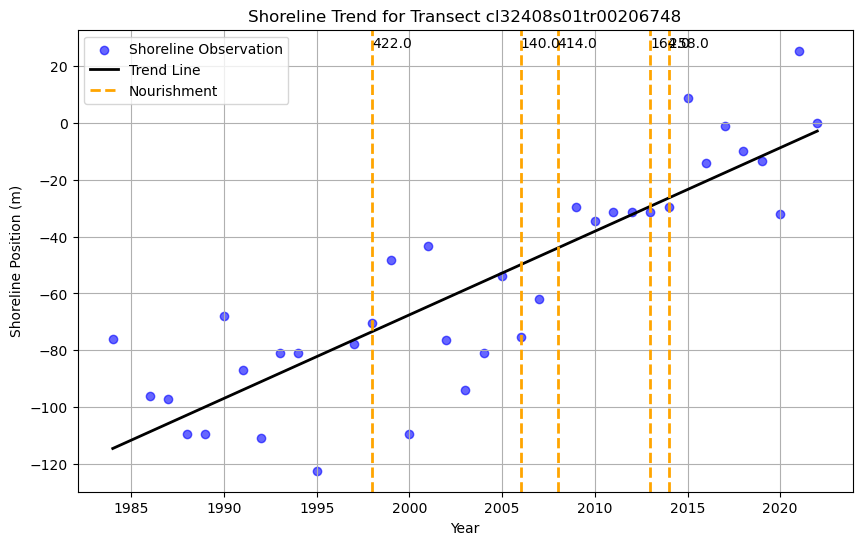

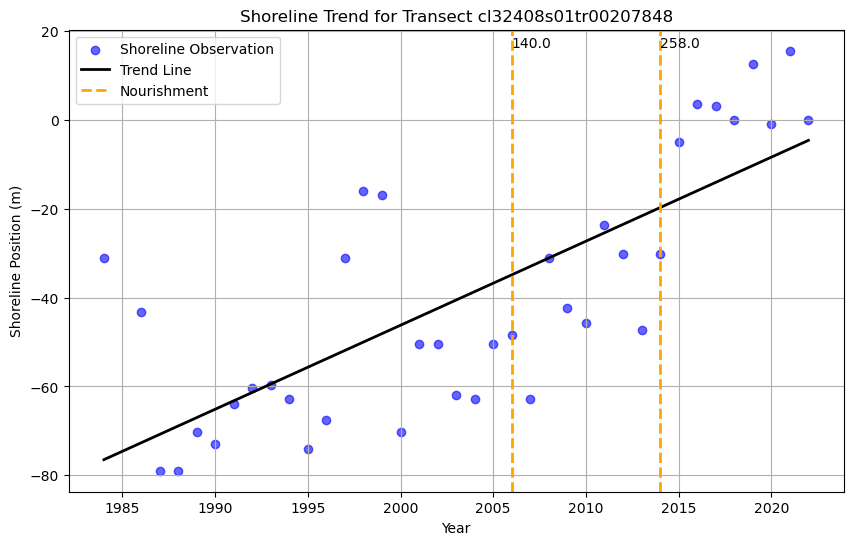

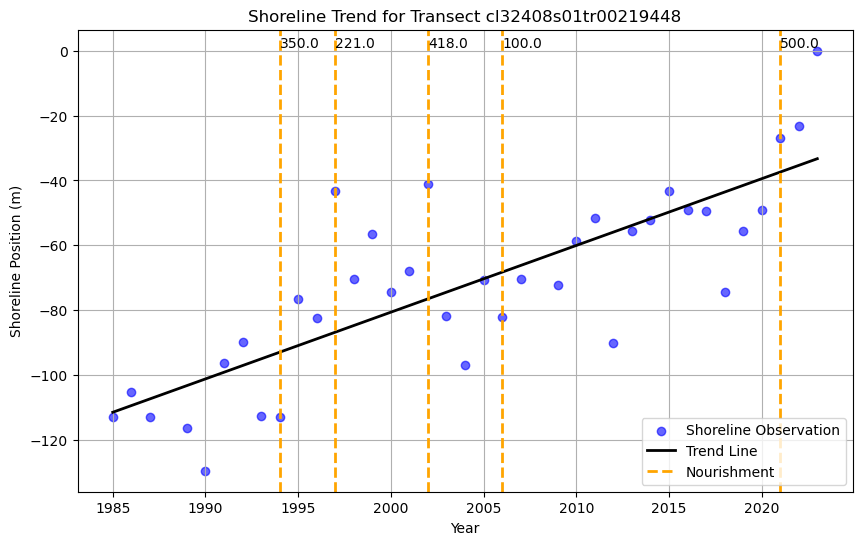

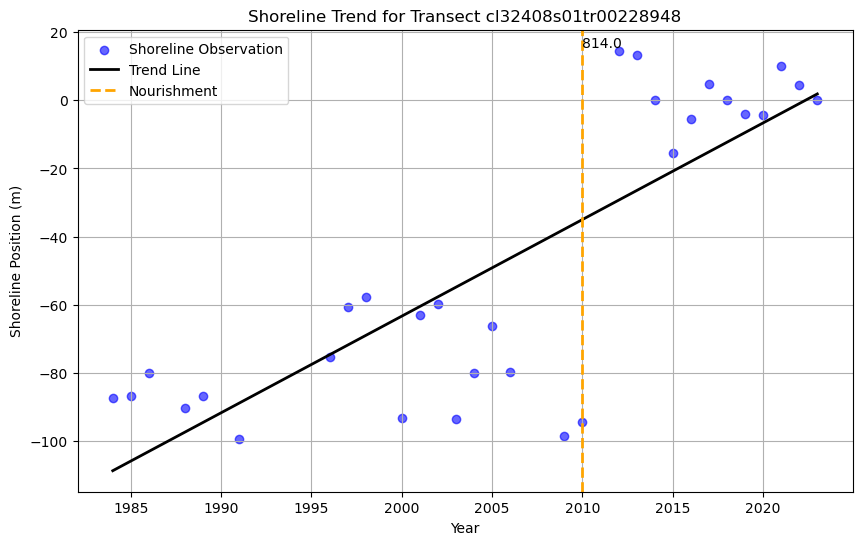

In [92]:
# Example: Load shoreline and nourishment data
shoreline_data = timeseries_nl
nourishment_data = transects_nourished
nourishment_data["year"] = pd.to_numeric(nourishment_data["year"], errors="coerce").astype("Int64")

# Ensure 'volume_per_m' is numeric
nourishment_data["volume_per_m"] = pd.to_numeric(nourishment_data["volume_per_m"], errors="coerce")


# Define the list of transect IDs to plot
transect_ids = ["cl32408s01tr00206748", "cl32408s01tr00207848", "cl32408s01tr00219448", "cl32408s01tr00228948"]

# Loop over each transect and plot the shoreline trend with nourishment events
for transect_id in transect_ids:
    print(f"Plotting transect: {transect_id}")  # Print progress
    plot_shoreline_trend_with_nourishment(shoreline_data, nourishment_data, transect_id)
    # Define the path to save the figure
    figures_dir = os.path.join("..", "figures")  # Adjust if needed

    # File path for saving
    figure_path = os.path.join(figures_dir, f"{transect_id}_nourishment_and_timeseries.png")

    # Save the figure
    plt.savefig(figure_path, dpi=300, bbox_inches="tight")  # High-resolution image

    print(f"Figure saved at: {figure_path}")



/var/folders/qg/thf308zn53v6k00gk5wr2bsm0000gn/T/ipykernel_91873/4152567358.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  transects_selected["geometry"] = transects_selected.geometry.centroid
/Users/juulhemmes/miniforge3/envs/coastal/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Figure saved at: ../figures/NL_nourishment_and_timeseries_locations_map.png


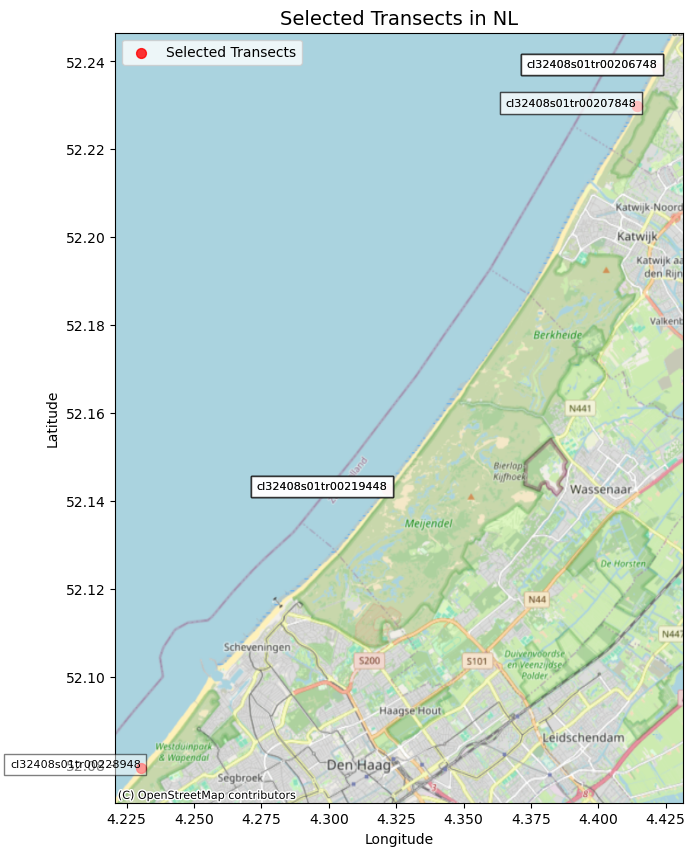

In [89]:
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd

# Filter only the selected transects
transects_selected = nourishment_data[nourishment_data["transect_id"].isin(transect_ids)]

# Convert LineString geometries to their centroid (Point)
transects_selected["geometry"] = transects_selected.geometry.centroid


# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the selected transects as red dots
transects_selected.plot(ax=ax, color="red", markersize=50, alpha=0.8, label="Selected Transects")

# Add labels for each transect ID
for x, y, label in zip(transects_selected.geometry.x, transects_selected.geometry.y, transects_selected["transect_id"]):
    ax.text(x, y, label, fontsize=8, ha="right", color="black", bbox=dict(facecolor='white', alpha=0.5))

# Add OSM basemap (keep in EPSG:4326)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs="EPSG:4326")

# Customize plot
ax.set_title("Selected Transects in NL", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()


# Define the path to save the figure
figures_dir = os.path.join("..", "figures")  # Adjust if needed
os.makedirs(figures_dir, exist_ok=True)  # Create the directory if it doesn't exist

# File path for saving
figure_path = os.path.join(figures_dir, f"NL_nourishment_and_timeseries_locations_map.png")

# Save the figure
plt.savefig(figure_path, dpi=300, bbox_inches="tight")  # High-resolution image

print(f"Figure saved at: {figure_path}")

#Show the plot
plt.show()

## Process the dataset in bulk

In [9]:
import dask_geopandas

fs = fsspec.filesystem("az", **storage_options)

urlpaths = series_snapshot.href.to_list()

ddf = dask_geopandas.read_parquet(urlpaths, filesystem=fs)
ddf

NameError: name 'series_snapshot' is not defined

In [ ]:
def process(df):
    # your code comes here
    ...
    return df


result = ddf.map_partitions(process)